## Analise exploratoria dos dados
### Contexto
Este estudo reúne informações socioeconômicas, territoriais e ambientais dos bairros de Belém com o intuito de compreender como características populacionais, indicadores de desenvolvimento humano e registros de descartes irregulares de resíduos se relacionam. A análise busca identificar padrões que possam explicar a ocorrência de Depósitos Irregulares de Entulho (DIEs) e como esses eventos se distribuem espacialmente em função das condições sociais e estruturais de cada bairro.

### Descrição das variaveis
- `Bairro:` Nome do bairro de Belém.
- `area_km2` Aréa do bairro  
- `Hab:` Número total de habitações no bairro.  
- `Mor:` Número total de moradores no bairro.  
- `Mor/Hab:` Média de moradores por habitação (`Moradores ÷ Habitações`).  
- `N_ren:` Número de moradores com renda registrada.  
- `ren_avg:`Renda média dos moradores do bairro.  
- `ren_mdn` Mediana da renda dos moradores do bairro
- `T.A.` Taxa de alfabetização
- `IDH-R` Índice de desenvolvimento humano Renda
- `IDH-L` Índice de desenvolvimento humano Longevidade
- `IDH-E` Índice de desenvolvimento humano Educação
- `IDH` Índice de desenvolvimento humano
- `QTI` Quantidade de Depósitos Irregulares
- `CRA` Mediana da renda dos moradores do bairro
- `PPR` Percentual Populacao_rendimento
- `DIEs` Quantidade de Depósitos Irregulares estimado

### Objetivo do estudo

O propósito central é identificar as regiões de Belém mais vulneráveis ao descarte irregular de resíduos, analisando como fatores socioeconômicos, densidade populacional e indicadores de desenvolvimento humano influenciam a ocorrência de depósitos irregulares. Os resultados apoiarão:

- A priorização de áreas críticas para fiscalização e ações educativas;
- A identificação de possíveis falhas na coleta de resíduos;
- O planejamento de políticas públicas mais eficientes para a gestão e prevenção do descarte irregular.


## 1.Biblioteca

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from setup_notebook import setup_path
setup_path()
from src.functions import *

from matplotlib.colors import LinearSegmentedColormap


color = sns.color_palette('RdBu_r',16)
sns.color_palette(color)

[(0.08419838523644754, 0.31280276816609, 0.5534025374855825),
 (0.1529411764705883, 0.4311418685121108, 0.6904267589388697),
 (0.23137254901960788, 0.5349480968858131, 0.7434832756632065),
 (0.3720876585928491, 0.6456747404844292, 0.8020761245674741),
 (0.554325259515571, 0.7610149942329875, 0.8643598615916955),
 (0.7033448673587083, 0.8389850057670127, 0.9079584775086506),
 (0.8371395617070359, 0.9063437139561707, 0.9444059976931949),
 (0.92479815455594, 0.9478662053056517, 0.9605536332179931),
 (0.9755478662053056, 0.9363321799307959, 0.9132641291810842),
 (0.9893886966551326, 0.8717416378316032, 0.8025374855824683),
 (0.9755478662053056, 0.7591695501730104, 0.6530565167243367),
 (0.9499423298731259, 0.6311418685121111, 0.49757785467128046),
 (0.8807381776239908, 0.47197231833910036, 0.3753171856978085),
 (0.8059976931949251, 0.31003460207612454, 0.27058823529411763),
 (0.7229527104959631, 0.1439446366782007, 0.19215686274509805),
 (0.5769319492502883, 0.05536332179930796, 0.14925028835063436)]

## 2. Dataload

In [15]:
# ---------------------------
# 0) carregue os arquivos (ajuste paths)
# ---------------------------
path = "/home/akel/PycharmProjects/Data_ambiental/data/process/"

dfo = pd.read_csv(path + "tabela_total_com_DIEs.csv")

df2 = pd.read_csv(path + "Bairros_Ncoleta.csv")


features=dfo.drop(['Bairro','DIEs'], axis=1).columns

dfo = dfo.merge(df2, on="Bairro", how="left")

dfo.head(5)

,Bairro,area_km2,Hab,Mor,Mor/Hab,N_ren,ren_avg,ren_mdn,T.A.,IDH-R,...,IDH-E,IDH,QTI,CRA,PPR,DIEs,nd_med,N_setores,V_setores_val,observacao
0,Cidade Velha,1.474443,3086,12119,3.93,6976.0,1931.71,1000.0,98.64,0.828,...,0.802,0.840,3.0,5148.804637,0.575625,3.0,4.80,4,4.0,OK
1,Guamá,4.310685,23402,94432,4.04,44917.0,940.73,510.0,95.91,0.709,...,0.699,0.746,4.0,881.657789,0.475654,4.0,4.63,10,10.0,OK
2,Jurunas,2.557641,15886,64478,4.06,32828.0,1065.28,510.0,95.99,0.778,...,0.762,0.802,9.0,1691.025975,0.509135,9.0,5.67,6,6.0,OK
3,Marambaia,5.052314,17563,66697,3.80,35312.0,1357.51,710.0,97.43,0.792,...,0.772,0.813,5.0,1021.024833,0.529439,5.0,3.00,8,8.0,OK
4,Marco,4.903819,18162,65819,3.62,36975.0,2096.32,1000.0,98.38,0.833,...,0.803,0.841,3.0,1547.503739,0.561768,3.0,5.13,13,13.0,OK


In [3]:
inital_describe(dfo)

📊 ANÁLISE EXPLORATÓRIA DO DATAFRAME

📈 DIMENSÕES DO DATASET:
   • 71 linhas
   • 21 colunas
   • Total de células: 1491

🔧 TIPOS DE DADOS:
   • float64: 16 colunas
   • int64: 3 colunas
   • object: 2 colunas

📋 DETALHAMENTO DOS TIPOS POR COLUNA:
                  Tipo
Bairro          object
area_km2       float64
Hab              int64
Mor              int64
Mor/Hab        float64
N_ren          float64
ren_avg        float64
ren_mdn        float64
T.A.           float64
IDH-R          float64
IDH-L          float64
IDH-E          float64
IDH            float64
QTI            float64
CRA            float64
PPR            float64
DIEs           float64
nd_med         float64
N_setores        int64
V_setores_val  float64
observacao      object

🔍 VERIFICAÇÃO DE QUALIDADE DOS DADOS

📝 REGISTROS DUPLICADOS:
   • Total: 0
   • Percentual: 0.00%

❌ VALORES NULOS:
   • Total: 52
   • Percentual: 3.49%

📊 COLUNAS COM VALORES NULOS:
   • QTI: 50 nulos (70.42%)
   • V_setores_val: 2 nulos (2.82

,count,mean,std,min,25%,50%,75%,max
area_km2,71.0,3.557682,3.945327,0.354317,1.490217,2.412497,4.446335,30.143205
Hab,71.0,5153.943662,5585.210284,42.000000,610.500000,3109.000000,7649.500000,23402.000000
Mor,71.0,19442.380282,21492.126610,132.000000,2425.500000,12124.000000,29702.000000,94432.000000
Mor/Hab,71.0,3.719155,0.238972,2.940000,3.605000,3.710000,3.865000,4.180000
N_ren,71.0,9743.394366,10871.854193,72.000000,1029.500000,6112.000000,13355.500000,44917.000000
ren_avg,71.0,1194.200845,847.810913,534.640000,711.890000,876.280000,1207.835000,4356.620000
ren_mdn,71.0,698.880282,439.391645,480.000000,510.000000,510.000000,650.000000,2800.000000
T.A.,71.0,95.937746,2.356575,86.490000,94.410000,95.990000,97.705000,99.610000
IDH-R,71.0,0.703620,0.099120,0.562000,0.625000,0.694000,0.748500,0.961000
IDH-L,71.0,0.817127,0.057088,0.723000,0.760000,0.824000,0.850000,0.932000



✅ ANÁLISE CONCLUÍDA


## 3. Distribuições

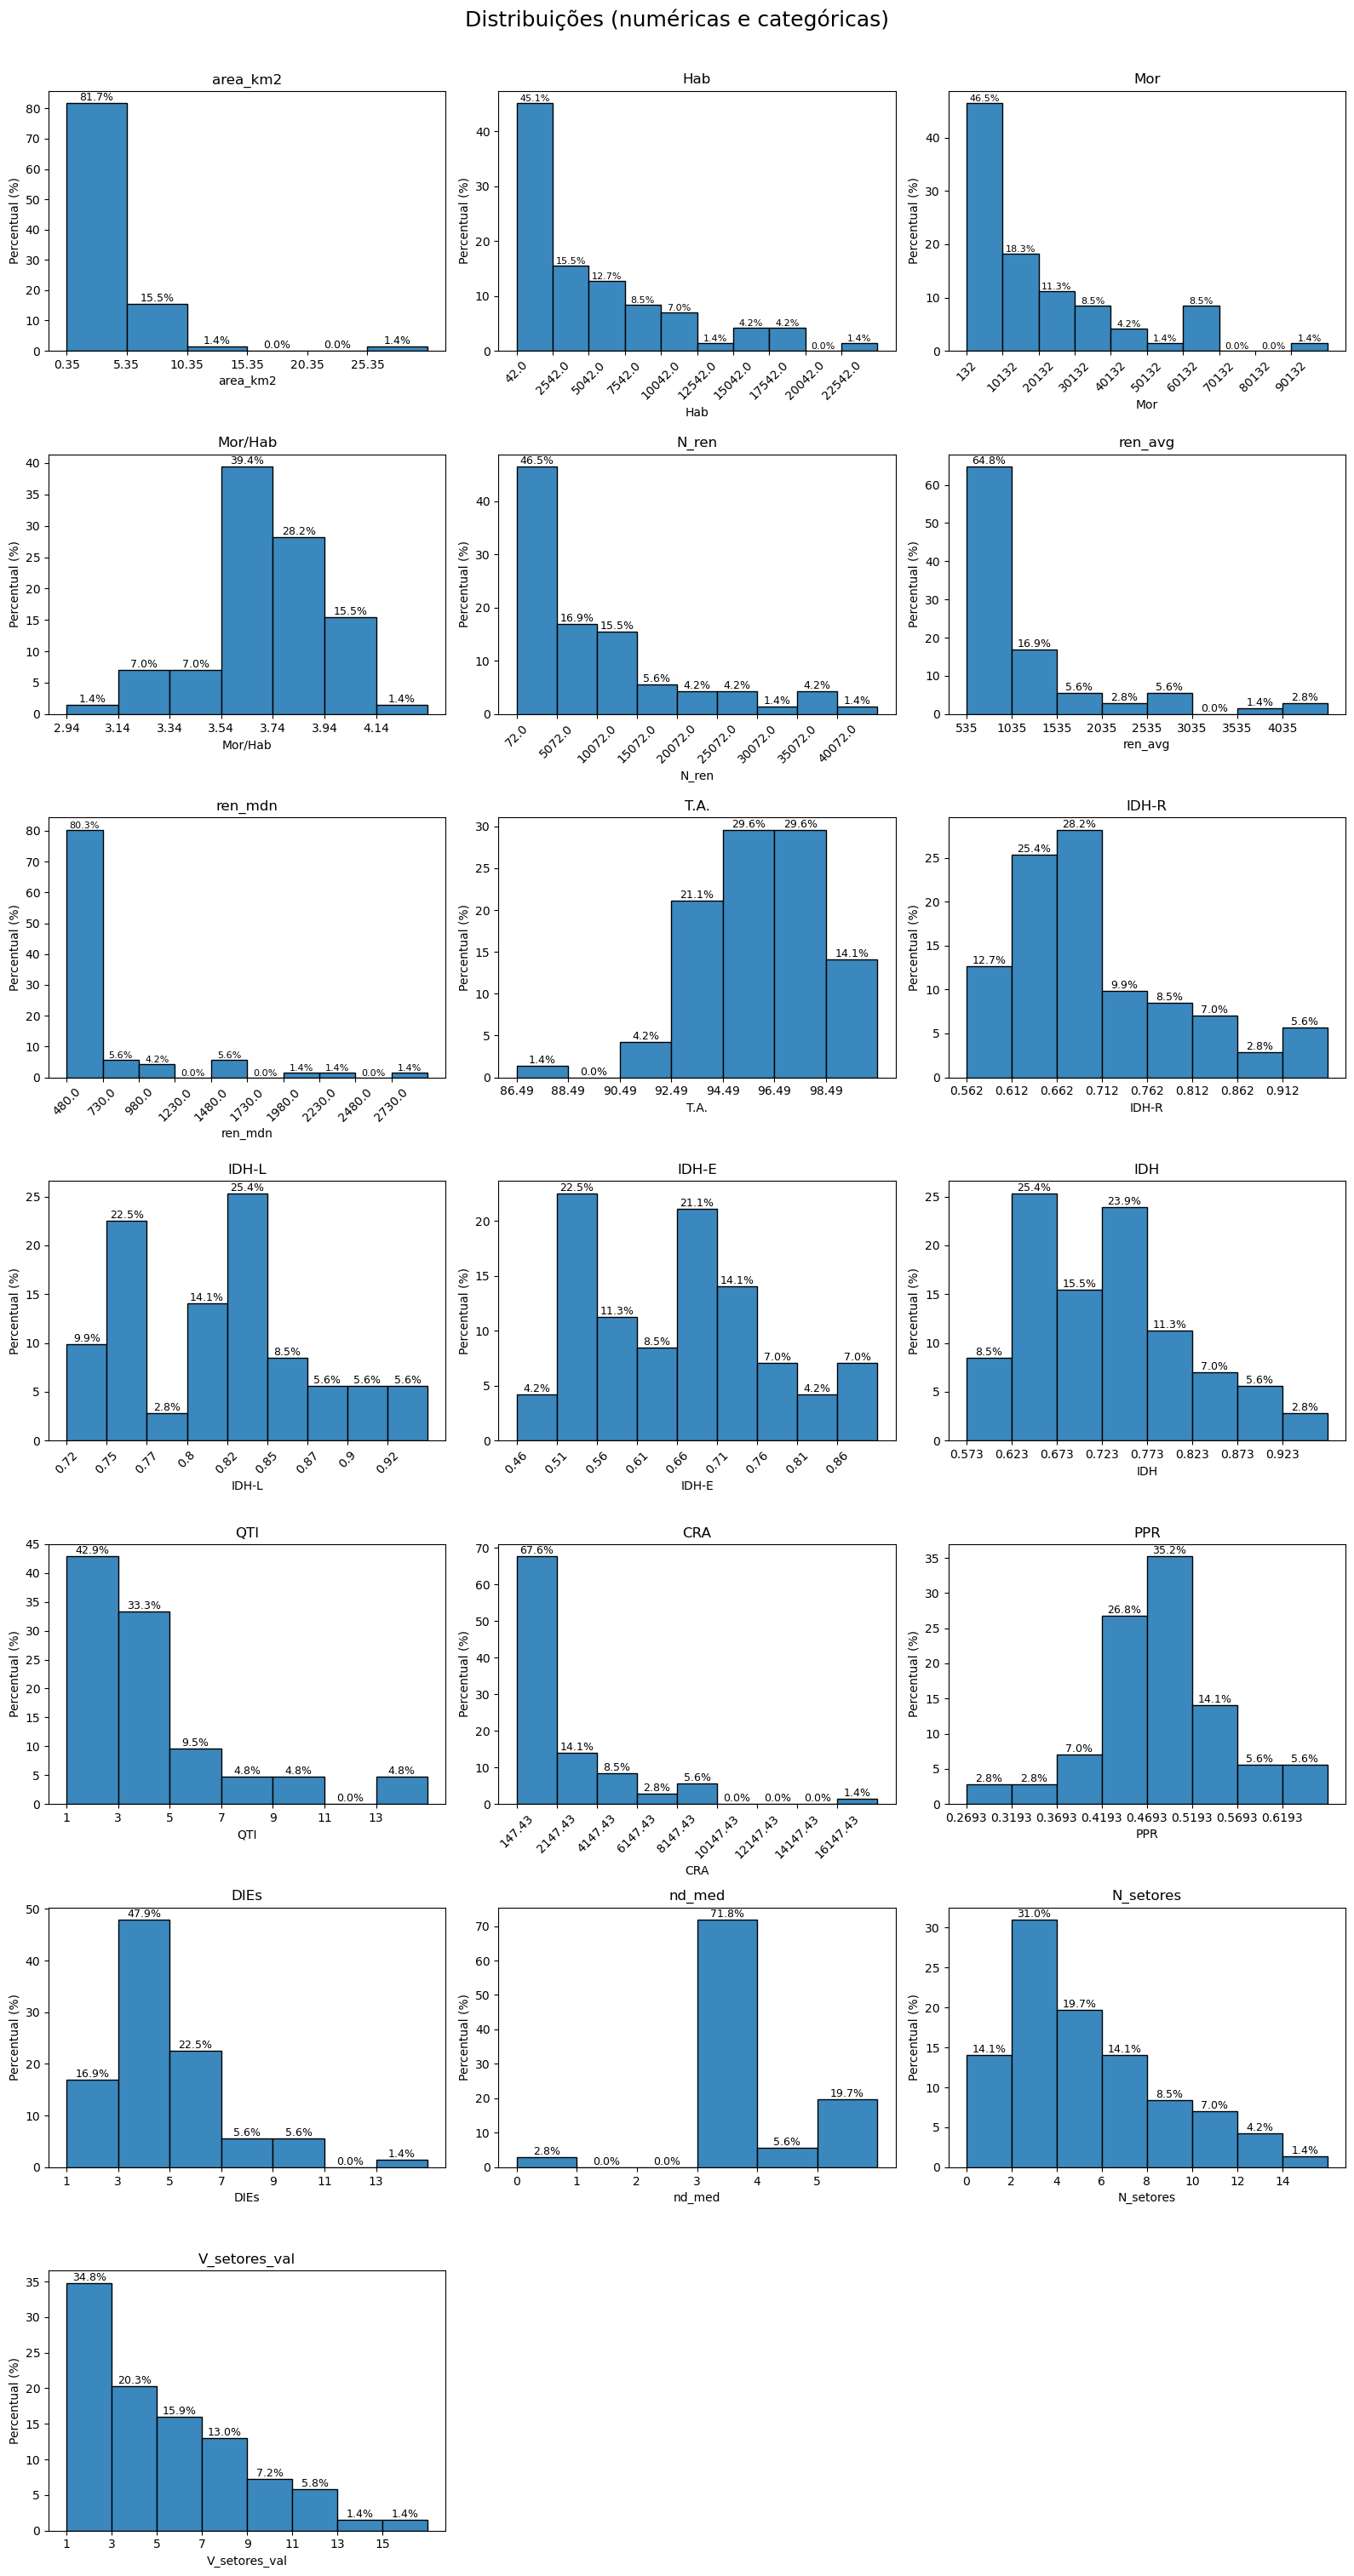

In [4]:
out=mult_plt2(dfo.drop('Bairro', axis=1).select_dtypes(include=['number']),max_bins=10,figsize=(16, 30))

A maior parte dos bairros (80.28%) apresenta renda mediana de R\$ 605,00 ou menos. Além disso, 46.48% dos bairros têm uma população  de até 5.132 habitantes, mas os bairros mais populosos,acima de 65.132 moradores, representam 8.45% da amostra, contribuindo para uma alta média populacional.Em termos estatísticos, isso é um efeito de assimetria na distribuição de dados, de ponto que  média alta não reflete a realidade da maioria dos bairros, mas sim a influência desproporcional de alguns poucos bairros muito populosos.

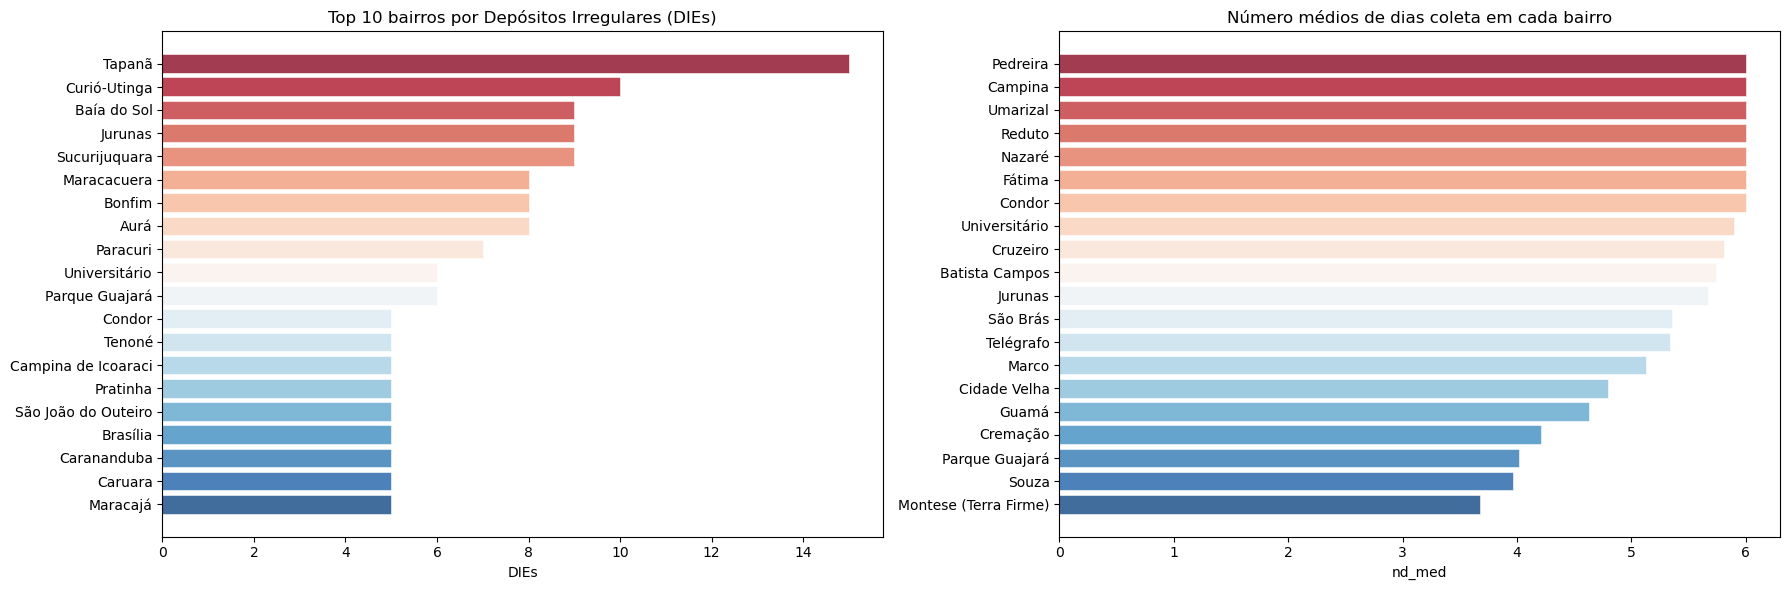

In [5]:

# Definir as cores
color = sns.color_palette('RdBu_r', 16)
gradient_colors = sns.color_palette('RdBu_r', n_colors=20)

# Criar figura com subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Subplot 1: Top 10 bairros por DIEs
top10_dies = dfo.sort_values(by="DIEs", ascending=False).head(20)
ax1.barh(top10_dies["Bairro"][::-1], top10_dies["DIEs"][::-1], 
         color=gradient_colors, alpha=0.8, edgecolor='white', linewidth=0.5)
ax1.set_xlabel("DIEs")
ax1.set_title("Top 10 bairros por Depósitos Irregulares (DIEs)")

# Subplot 2: Top 10 bairros por nd_med
top10_nd = dfo.sort_values(by="nd_med", ascending=False).head(20)
ax2.barh(top10_nd["Bairro"][::-1], top10_nd["nd_med"][::-1], 
         color=gradient_colors, alpha=0.8, edgecolor='white', linewidth=0.5)
ax2.set_xlabel("nd_med")
ax2.set_title("Número médios de dias coleta em cada bairro")

# Ajustar layout
plt.tight_layout()
plt.show()


## 4. Correlação

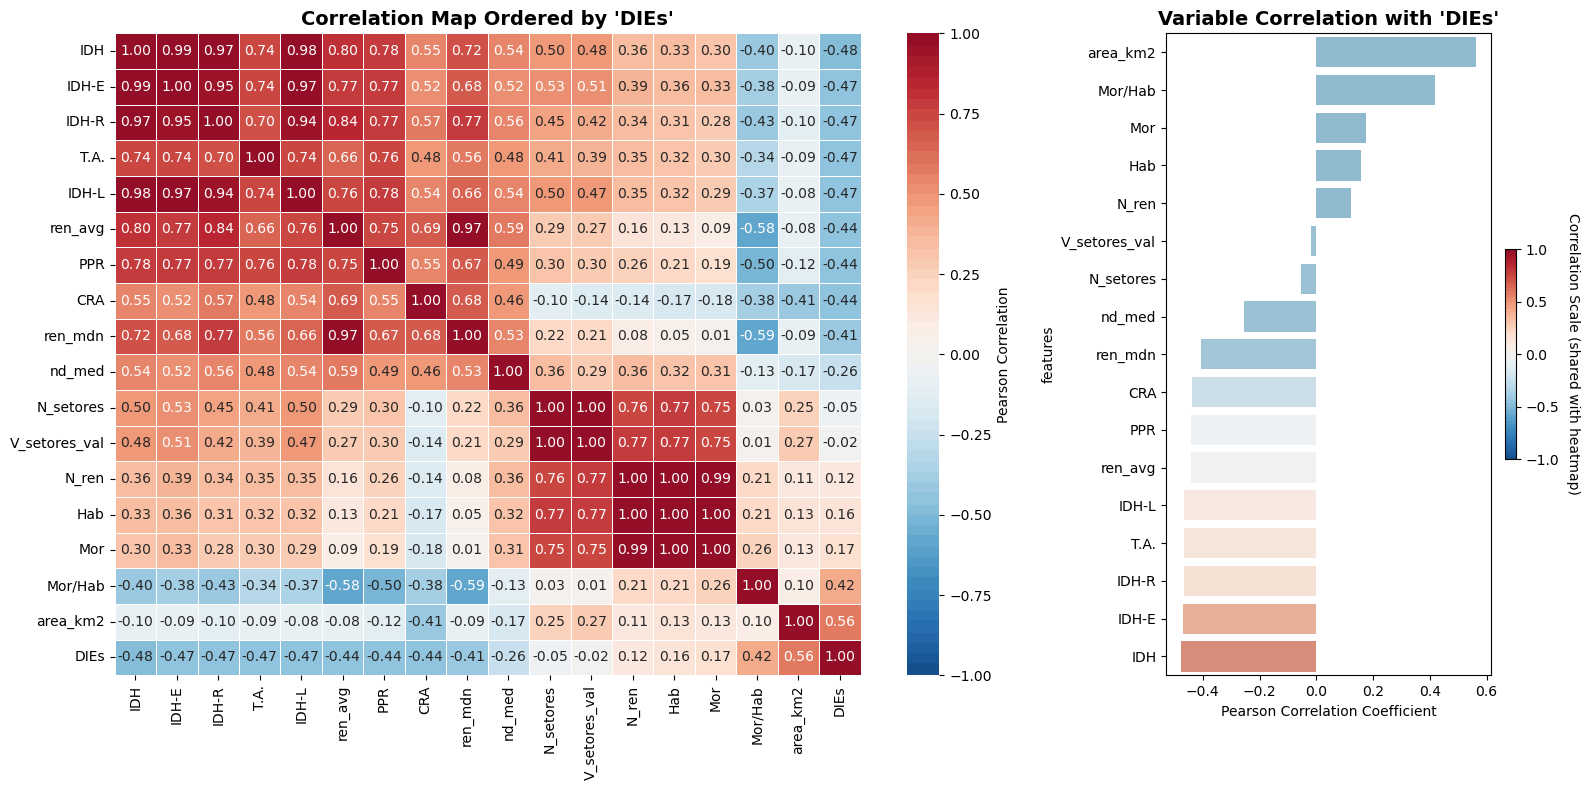

In [6]:
corr,corr_tag=correlation_bar(dfo.drop('QTI', axis=1),'DIEs')

## 5. Analise Bivariada

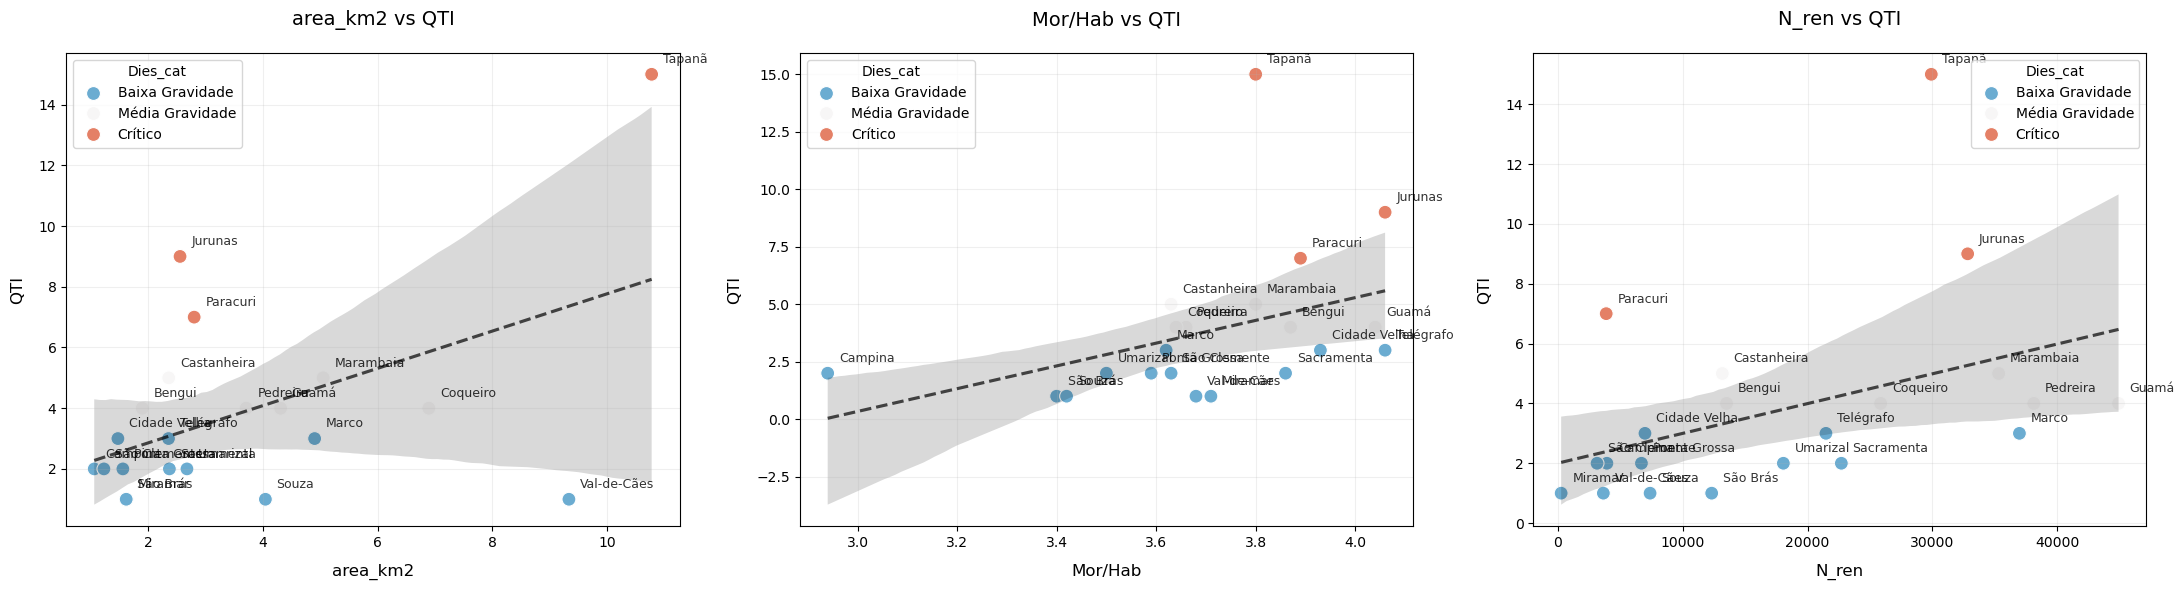

ESTATÍSTICAS DAS RELAÇÕES

--- Relação 1 ---
ren_mdn vs QTI
Observações válidas: 21
Correlação (r): -0.4640
R-quadrado (r²): 0.2153
Valor-p: 0.0341
Equação da reta: y = -0.0039x + 7.0695
Coeficiente angular: -0.0039
Intercepto: 7.0695
Interpretação: MODERADA correlação NEGATIVA (ESTATISTICAMENTE SIGNIFICATIVA)


In [14]:
def categorizar_dies(dies):
    if dies == 0:
        return 'Aceitável'
    elif 1 <= dies <= 3:
        return 'Baixa Gravidade'
    elif 4 <= dies <= 6:
        return 'Média Gravidade'
    else:  # dies >= 7
        return 'Crítico'
dfo['Dies_cat'] = dfo['DIEs'].apply(categorizar_dies)

stats1, stats2, stats3 = scatterplot_bairro('area_km2', 'Mor/Hab', 'N_ren', 'QTI', dfo,'Dies_cat')
#stats4, stats5, stats6 = scatterplot_bairro('Mor', 'ren_mdn', 'IDH', 'QTI', dfo,'Dies_cat')
#fig.write_image("/home/akel/PycharmProjects/Data_ambiental/image/IDH_QTI.png",width=1280, height=720)

#stats7, stats8, stats9 = scatterplot_bairro('nd_med', 'ren_avg', 'IDH', 'QTI', dfo,'Dies_cat')
print_estatisticas(stats5)

##  Principais Achados Técnicos

### 1. Indicadores de Descarte Irregular (DIEs)

* **Frequência de Coleta**: A média de dias de coleta é de 3.59 dias/semana (desvio-padrão de 1.27). No entanto, 71.83% dos bairros possuem coleta de 3 a 3.5 dias/semana, evidenciando que a maioria dos bairros tem coleta parcial (3 dias), enquanto apenas 19.72% têm coleta próxima a 6 dias.

* **Dispersão:** A quantidade estimada de Depósitos Irregulares de Entulho (DIEs) apresenta uma média de 4.37 por bairro (desvio-padrão de 2.33), com a maioria dos bairros registrando entre 3 e 5 DIEs (47.89% com 4 DIEs, e 22.54% com 6 DIEs). O valor máximo atinge 15 DIEs.

* **Quantidade Registrada (QTI):** A variável `QTI` (quantidade de Depósitos Irregulares registrados, para 21 observações) tem uma média de 3.81 e uma distribuição concentrada em valores baixos (42.86% com 2 QTI e 33.33% com 4 QTI)

### 2. Padrão Socioeconômico dos Bairros

* **Renda:** A renda média (`ren_avg`) é de R\$1,194.20, mas a mediana (`ren_mdn`) é significativamente menor(R\$698.88 ) indicando uma alta concentração de renda em valores mais baixos. A maior parte dos bairros (80.28%) tem uma renda mediana concentrada na faixa de   R\$605.00 ou menos.

* **População:** A distribuição populacional é desigual, com a maioria dos bairros (46.48%) tendo até 5,132 moradores (`Mor`). A média de Moradores por Habitação (`Mor/Hab`) é de 3.72, um indicador relativamente estável entre os bairros.

* **IDH:** varia significativamente, com bairros na faixa de IDH considerado médio (8.45% com 0.598 ou menos) e uma grande concentração nas faixas de 0.648 a 0.748 (cerca de 49%).

## Insights para o Descarte Irregular de Lixo

### 1. Influência da Renda e Desenvolvimento Humano (IDH)

Existe uma correlação negativa e estatisticamente significativa entre o descarte irregular e os indicadores de desenvolvimento e renda:

* `ren_avg` vs `QTI`: Bairros com maior renda média tendem a ter menos registros de descarte irregula ($r = -0.4406$). 
* `IDH` vs `QTI`: Bairros com melhor Índice de Desenvolvimento Humano (IDH) tendem a registrar menos descarte irregular ($r = -0.4399$).
* Correlação Geral (DIEs): Na matriz de correlação, a variável DIEs apresenta correlações negativas moderadas com a maioria dos indicadores de desenvolvimento, como `IDH` ($r = -0.477$), `IDH-E` ($r = -0.468$) e `ren_avg` ($r = -0.443$), reforçando a tese de que piores condições de vida estão associadas a maior descarte irregular.


### 2. Influência da Densidade e Tamanho do Bairro

As características territoriais e populacionais têm uma influência importante:

* Área (`area\_km2`) vs DIEs: Correlação positiva moderada de $r = 0.564$. Bairros maiores tendem a ter mais DIEs.
* População (`Mor`) vs DIEs (e QTI):
  * Mor vs DIEs: Correlação positiva fraca de $r = 0.175$
  * Mor vs QTI: Correlação positiva moderada de $r = 0.4847$ ($p < 0.05$). Isso sugere que bairros mais populosos (Mor) têm um número significativamente maior de registros de descarte irregular (QTI), indicando que a escala populacional é um fator de risco.
* Moradores por Habitação (`Mor/Hab`) vs DIEs: Correlação positiva moderada de $r = 0.420$. Bairros com mais moradores por residência tendem a ter mais DIEs.


### 3. Territórios maiores têm maior probabilidade de se tornarem áreas de abandono

A maior extensão territorial ($\text{area\_km2}$) amplifica o risco de descarte irregular devido a três fatores inter-relacionados:
* **Áreas Não Fiscalizadas e de Baixa Cobertura:** A grande extensão territorial dos bairros acarreta um esforço logístico de fiscalização desproporcional, resultando na baixa frequência de monitoramento e na diminuição da percepção de risco pelos infratores, o que incentiva o descarte irregular em áreas isoladas.
* Espaços Vazios e Terrenos Baldios: A maior extensão territorial aumenta a disponibilidade de terrenos baldios e espaços vazios, que são percebidos como locais neutros e fora da vista para o descarte clandestino, e frequentemente desencadeiam um efeito contágio que acelera a degradação e o abandono.
* Trechos Periféricos de Difícil Acesso: A infraestrutura viária deficiente (ruas não pavimentadas e acessos estreitos) em áreas periféricas de bairros grandes impede a circulação eficiente dos caminhões de coleta e fiscalização, criando um ambiente de alta vulnerabilidade que favorece o descarte clandestino de diversos tipos de resíduos.
